In [130]:
# !pip install pyLDAvis
import pandas as pd
from utils import *
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pyLDAvis
from pyLDAvis import sklearn as sk
from sklearn.externals import joblib
import pickle

save_model_filename = 'lda_13_topics_stemmed.pkl'
best_lda_model = joblib.load(save_model_filename) 

with open("lda_13_tops_vectorizer", 'rb') as fp:
    vectorizer = pickle.load(fp)
    
with open("lda_13_tops_data_vectorized", 'rb') as fp:
    data_vectorized = pickle.load(fp)

In [172]:
with open("recommender_test_article.txt", "r") as fp:
    article = fp.read()

In [173]:
with open("data/coaches.txt", "r") as fp:
    coaches = [team.replace("\n", "").strip().lower() for team in fp.readlines()]
    
with open("data/teams.txt", "r") as fp:
    teams = [team.replace("\n", "").strip().lower() for team in fp.readlines()]
    
df = pd.read_csv("data/cities_teams.csv", header=None)

cities = [v.lower() for v in df[0].values]
team_names = [v.lower().strip() for v in df[1].values]

players_first_names, players_last_names = zip(*[p.split() for p in TOP_100_PLAYERS])

name_dict = {}
for p in TOP_100_PLAYERS:
    name_dict[p.split()[0]] = p
    name_dict[p.split()[1]] = p

name_dict["james"] = "lebron james"

def clean_doc(text):
    common = {"bron": "lebron_james", "kd": "kevin_durant", "steph": "stephen_curry", "russ": "russell_westbrook"}
    
    original_text = " ".join([word.lower() for word in text.split() if word.isalpha()])
    text = original_text # for modification
    
    for fn in players_first_names:
        wholename = name_dict[fn]
        if fn in text and wholename in original_text: # if first name and entire name is somewhere in text
            text = text.replace(wholename, "_".join(wholename.split())) # join wholename with underscore
            text = text.replace(" " + fn + " ", " " + "_".join(wholename.split()) + " ") #join the first name
    
    for ln in players_last_names:
        wholename = name_dict[ln]
        if ln in text and wholename in original_text: # if first name and entire name is somewhere in text
            text = text.replace(wholename, "_".join(wholename.split())) # join wholename with underscore
            text = text.replace(" " + ln + " ", " " + "_".join(wholename.split()) + " ") #join the first name

    for team in teams:
        if team in text:
            text = text.replace(" " + team + " ", " " + "_".join(team.split()) + " ")

    for city in cities:
        if city in text:
            text = text.replace(" " + city + " ", " " + "_".join(city.split()) + " ")

    for name in team_names:
        if name in text:
            text = text.replace(" " + name + " ", " " + "_".join(name.split()) + " ")
            
    for coach in coaches:
        last_name = coach.split()[1]
        if coach in text:
            text = text.replace(" " + coach + " ", " " + "_".join(coach.split()) + " ")
            text = text.replace(" " + last_name + " ", " " + "_".join(coach.split()) + " ")

    
    for acr, real in common.items():
        text = text.replace(" " + acr + " ", " " + real + " ")
    
    return text


In [174]:
art = clean_doc(article)
art = art.replace("lebron_james_harden", "lebron_james james_harden") + " lebron_james"

In [175]:
art_vec = vectorizer.transform([art])
data_vectorized = art_vec

In [176]:
# Create Document - Topic Matrix
lda_vectorized_test_doc = best_lda_model.transform(data_vectorized)

In [181]:
topics = ["stats", "informal", "warriors", "trades & free agency", "lebron & cavaliers", "college hoops", 
          "playoffs round 1", "lakers", "knicks & all-star", "playoffs", "NFL", "76ers", "soccer", ]

Text(0.5,1,"Topic Distribution for Article:\nKeith Pompey on 76ers' Pursuit of LeBron James: Prepared to Do Whatever It Takes")

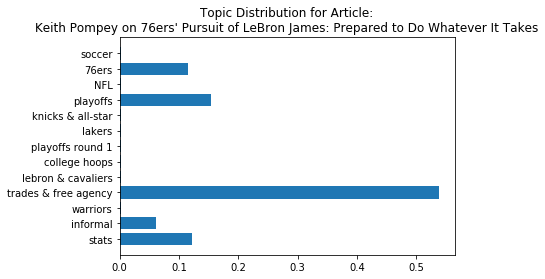

In [182]:
plt.barh(topics, lda_vectorized_test_doc[0])
plt.title("Topic Distribution for Article:\nKeith Pompey on 76ers' Pursuit of LeBron James: Prepared to Do Whatever It Takes")

# Get Previous Documents

In [39]:
docs_cleaned_file = "docs_cleaned_saturday2"
with open (docs_cleaned_file, 'rb') as fp:
    docs = pickle.load(fp)

In [110]:
# for i in np.argsort(topic)[::-1][:50]:
#     print(list(vectorizer.vocabulary_.keys())[i])

In [116]:
# # Define function to predict topic for a given text document.
# def predict_topic(text):
#     global sent_to_words
#     global lemmatization

#     # Step 3: Vectorize transform
#     mytext_4 = vectorizer.transform(text)

#     # Step 4: LDA Transform
#     topic_probability_scores = best_lda_model.transform(mytext_4)
#     topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
#     return topic, topic_probability_scores

# # Predict the topic
# mytext = [art]
# topic, prob_scores = predict_topic(text = mytext)
# print(topic)

In [118]:
data_vectorized = vectorizer.transform(docs)
# Create Document - Topic Matrix
lda_vectorized = best_lda_model.transform(data_vectorized)
lda_vectorized.shape

In [127]:
distances = np.array([np.linalg.norm(v - lda_vectorized_test_doc[0]) for v in lda_vectorized])
sorted_neighbors = np.argsort(distances)

In [185]:
sorted_neighbors

array([1937, 2537,  489, ...,  561,  451,  540])

In [189]:
# l = sorted_neighbors[:3] + sorted_neighbors[4:10]

In [204]:
for ind, i in enumerate(sorted_neighbors[:6]):
    if ind != 3:
        print(all_articles[i]['title'])

Dennis Lindsey on Suns-Jazz Fight: 'You Expect Players to Be Protected' by NBA
'I Feel That I Was Chosen to Do It': Chris Bosh Gets Serious About NBA Comeback
NBA Free Agents 2018: Top Rumors, Speculation and Predictions
Predicting Fallout from LeBron James' 2018 Free-Agency Decision
6 Bold Predictions for 2018 NBA Free Agency


In [94]:
lda_output = lda_vectorized

In [96]:
# Create Document - Topic Matrix
# lda_output = best_lda_model.transform(data_vectorized)

# column names
best_n_topics = 13
topicnames = ["Topic" + str(i) for i in range(best_n_topics)]

# topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(docs))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,dominant_topic
Doc0,0,0.31,0,0,0,0,0.22,0,0.02,0.29,0.16,0,0,1
Doc1,0.11,0.16,0,0,0,0,0.4,0.12,0,0.16,0.05,0,0,6
Doc2,0.06,0.54,0,0,0.08,0,0.1,0,0,0.17,0.05,0,0,1
Doc3,0.08,0.63,0,0,0,0.01,0,0,0,0.22,0.05,0,0,1
Doc4,0.08,0.63,0,0,0,0.01,0,0,0,0.22,0.05,0,0,1
Doc5,0,0.32,0,0,0.02,0,0.34,0,0,0.23,0.08,0,0,6
Doc6,0.09,0.52,0,0,0,0,0.13,0,0,0.23,0.03,0,0,1
Doc7,0,0.29,0,0.1,0,0,0.27,0,0,0.25,0.08,0,0,1
Doc8,0.09,0.52,0,0,0,0,0.13,0,0,0.23,0.03,0,0,1
Doc9,0.15,0,0,0,0,0.16,0,0,0,0,0.68,0,0,10


In [100]:
topicnames = ["Topic" + str(i) for i in range(13)]
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,aaron,abc,abil,abl,absenc,absolut,absorb,absurd,abysm,academi,...,younger,youngmisuk,youngster,youth,youtub,zach,zaza,zero,zhair,zone
Topic0,0.114176,0.168671,29.778160,98.225207,88.950217,2.574489,3.650831,0.078346,10.595168,0.076938,...,28.972420,16.924503,7.197786,1.487497,0.077009,1.273951,0.076996,27.489121,0.076960,0.077078
Topic1,0.077067,0.078276,24.352847,90.433881,115.154376,28.632578,13.698200,16.196286,19.215500,0.076937,...,2.882547,0.295008,0.089031,9.622505,0.086665,13.024975,35.949124,22.696582,0.076953,8.763446
Topic2,47.178097,0.076938,128.424249,92.043093,0.076983,0.077025,0.076971,0.077295,0.077854,141.035044,...,10.597348,0.076942,0.076938,0.076959,0.076953,20.147100,0.076932,0.077087,60.648512,55.478285
Topic3,116.168113,0.076941,41.063432,77.947694,0.282920,27.222306,22.811294,4.770050,0.077022,0.076933,...,46.439233,17.690897,9.034532,35.271700,0.076936,108.659763,2.152651,10.829052,0.076955,4.717152
Topic4,64.436277,0.076952,12.989542,34.049306,0.516586,0.095269,0.076975,0.077058,0.077003,0.076969,...,32.495184,0.077109,0.078264,6.590700,10.372360,55.735684,0.077297,0.076961,0.076986,2.083581


In [77]:
import codecs
article_dicts_filename = "article_dicts_saturday2"
all_articles = []
with codecs.open(article_dicts_filename,'rU','utf-8') as f:
    for line in f:
        all_articles.append(json.loads(line))

/Users/stephen/anaconda3/lib/python3.6/codecs.py:897: DeprecationWarning: 'U' mode is deprecated
  file = builtins.open(filename, mode, buffering)


In [81]:
all_articles[neighbor]['title']

"Dennis Lindsey on Suns-Jazz Fight: 'You Expect Players to Be Protected' by NBA"